In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from tqdm import tqdm
import numpy as np

In [2]:
data = pd.read_csv("dataset_mood_smartphone.csv", index_col=0)              # Load the data                                                    

In [4]:
data.tail(), data.columns

(              id                     time        variable   value
 2770399  AS14.30  2014-04-11 07:51:16.948  appCat.weather   8.032
 2772465  AS14.30  2014-04-19 11:00:32.747  appCat.weather   3.008
 2774026  AS14.30  2014-04-26 10:19:07.434  appCat.weather   7.026
 2774133  AS14.30  2014-04-27 00:44:48.450  appCat.weather  23.033
 2784435  AS14.32  2014-04-07 18:25:14.036  appCat.weather  22.431,
 Index(['id', 'time', 'variable', 'value'], dtype='object'))

In [6]:
# Pivot the dataset to have each variable as a column
data_pivoted = data.pivot_table(index=['id', 'time'], columns='variable', values='value', aggfunc='first').reset_index()

# Show the transformed data
data_pivoted.head()

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [8]:
# Dataset summary
summary = {
    "Number of Records": len(data_pivoted),
    "Number of Attributes": len(data_pivoted.columns),
    "Attribute Types": data_pivoted.dtypes,
    "Missing Values": data_pivoted.isnull().sum(),
    "Range of Numeric Values": data_pivoted.describe().loc[['min', 'max']],
}

# Prepare descriptions for numeric attributes
numerical_descriptions = data_pivoted.describe()

numerical_descriptions


variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
count,22965.000000,91288.000000,74276.000000,27125.000000,939.000000,813.000000,5642.000000,7650.000000,19145.000000,2846.000000,939.000000,2487.000000,255.000000,5239.0,5582.000000,5474.000000,5628.000000,96578.000000,1798.0
mean,0.115958,18.538262,43.343792,37.576480,21.755251,128.391615,22.578892,25.810839,72.401906,45.730850,45.553006,18.537552,20.148714,1.0,-0.097635,0.689258,6.993959,75.335206,1.0
std,0.186946,415.989243,128.912750,262.960476,39.218361,327.145246,449.601382,112.781355,261.551846,246.109307,119.400405,60.959134,24.943431,0.0,1.051427,0.670218,1.031906,253.822497,0.0
min,0.000000,-82798.871000,0.006000,-0.011000,0.131000,1.003000,0.003000,0.014000,0.094000,0.080000,0.111000,0.246000,1.003000,1.0,-2.000000,-2.000000,1.000000,0.035000,1.0
25%,0.000000,2.020000,5.218000,1.334000,4.072000,14.148000,2.004000,7.019000,9.030000,5.086500,5.018000,3.158500,8.684000,1.0,-1.000000,0.000000,7.000000,5.322250,1.0
50%,0.021739,4.038000,16.225500,3.391000,8.026000,43.168000,3.106000,10.028000,28.466000,18.144000,17.190000,8.030000,15.117000,1.0,0.000000,1.000000,7.000000,20.044500,1.0
75%,0.158333,9.922000,45.475750,14.922000,20.155000,123.625000,8.043750,16.829250,75.372000,47.227250,44.430500,19.331000,25.349000,1.0,1.000000,1.000000,8.000000,62.540250,1.0
max,1.000000,33960.246000,9830.777000,32148.677000,355.513000,5491.793000,32708.818000,3892.038000,30000.906000,10452.615000,2239.937000,1802.649000,344.863000,1.0,2.000000,2.000000,10.000000,9867.007000,1.0


In [9]:
data_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358926 entries, 0 to 358925
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    358926 non-null  object 
 1   time                  358926 non-null  object 
 2   activity              22965 non-null   float64
 3   appCat.builtin        91288 non-null   float64
 4   appCat.communication  74276 non-null   float64
 5   appCat.entertainment  27125 non-null   float64
 6   appCat.finance        939 non-null     float64
 7   appCat.game           813 non-null     float64
 8   appCat.office         5642 non-null    float64
 9   appCat.other          7650 non-null    float64
 10  appCat.social         19145 non-null   float64
 11  appCat.travel         2846 non-null    float64
 12  appCat.unknown        939 non-null     float64
 13  appCat.utilities      2487 non-null    float64
 14  appCat.weather        255 non-null     float64
 15  

In [10]:
data_pivoted.describe()

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
count,22965.000000,91288.000000,74276.000000,27125.000000,939.000000,813.000000,5642.000000,7650.000000,19145.000000,2846.000000,939.000000,2487.000000,255.000000,5239.0,5582.000000,5474.000000,5628.000000,96578.000000,1798.0
mean,0.115958,18.538262,43.343792,37.576480,21.755251,128.391615,22.578892,25.810839,72.401906,45.730850,45.553006,18.537552,20.148714,1.0,-0.097635,0.689258,6.993959,75.335206,1.0
std,0.186946,415.989243,128.912750,262.960476,39.218361,327.145246,449.601382,112.781355,261.551846,246.109307,119.400405,60.959134,24.943431,0.0,1.051427,0.670218,1.031906,253.822497,0.0
min,0.000000,-82798.871000,0.006000,-0.011000,0.131000,1.003000,0.003000,0.014000,0.094000,0.080000,0.111000,0.246000,1.003000,1.0,-2.000000,-2.000000,1.000000,0.035000,1.0
25%,0.000000,2.020000,5.218000,1.334000,4.072000,14.148000,2.004000,7.019000,9.030000,5.086500,5.018000,3.158500,8.684000,1.0,-1.000000,0.000000,7.000000,5.322250,1.0
50%,0.021739,4.038000,16.225500,3.391000,8.026000,43.168000,3.106000,10.028000,28.466000,18.144000,17.190000,8.030000,15.117000,1.0,0.000000,1.000000,7.000000,20.044500,1.0
75%,0.158333,9.922000,45.475750,14.922000,20.155000,123.625000,8.043750,16.829250,75.372000,47.227250,44.430500,19.331000,25.349000,1.0,1.000000,1.000000,8.000000,62.540250,1.0
max,1.000000,33960.246000,9830.777000,32148.677000,355.513000,5491.793000,32708.818000,3892.038000,30000.906000,10452.615000,2239.937000,1802.649000,344.863000,1.0,2.000000,2.000000,10.000000,9867.007000,1.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


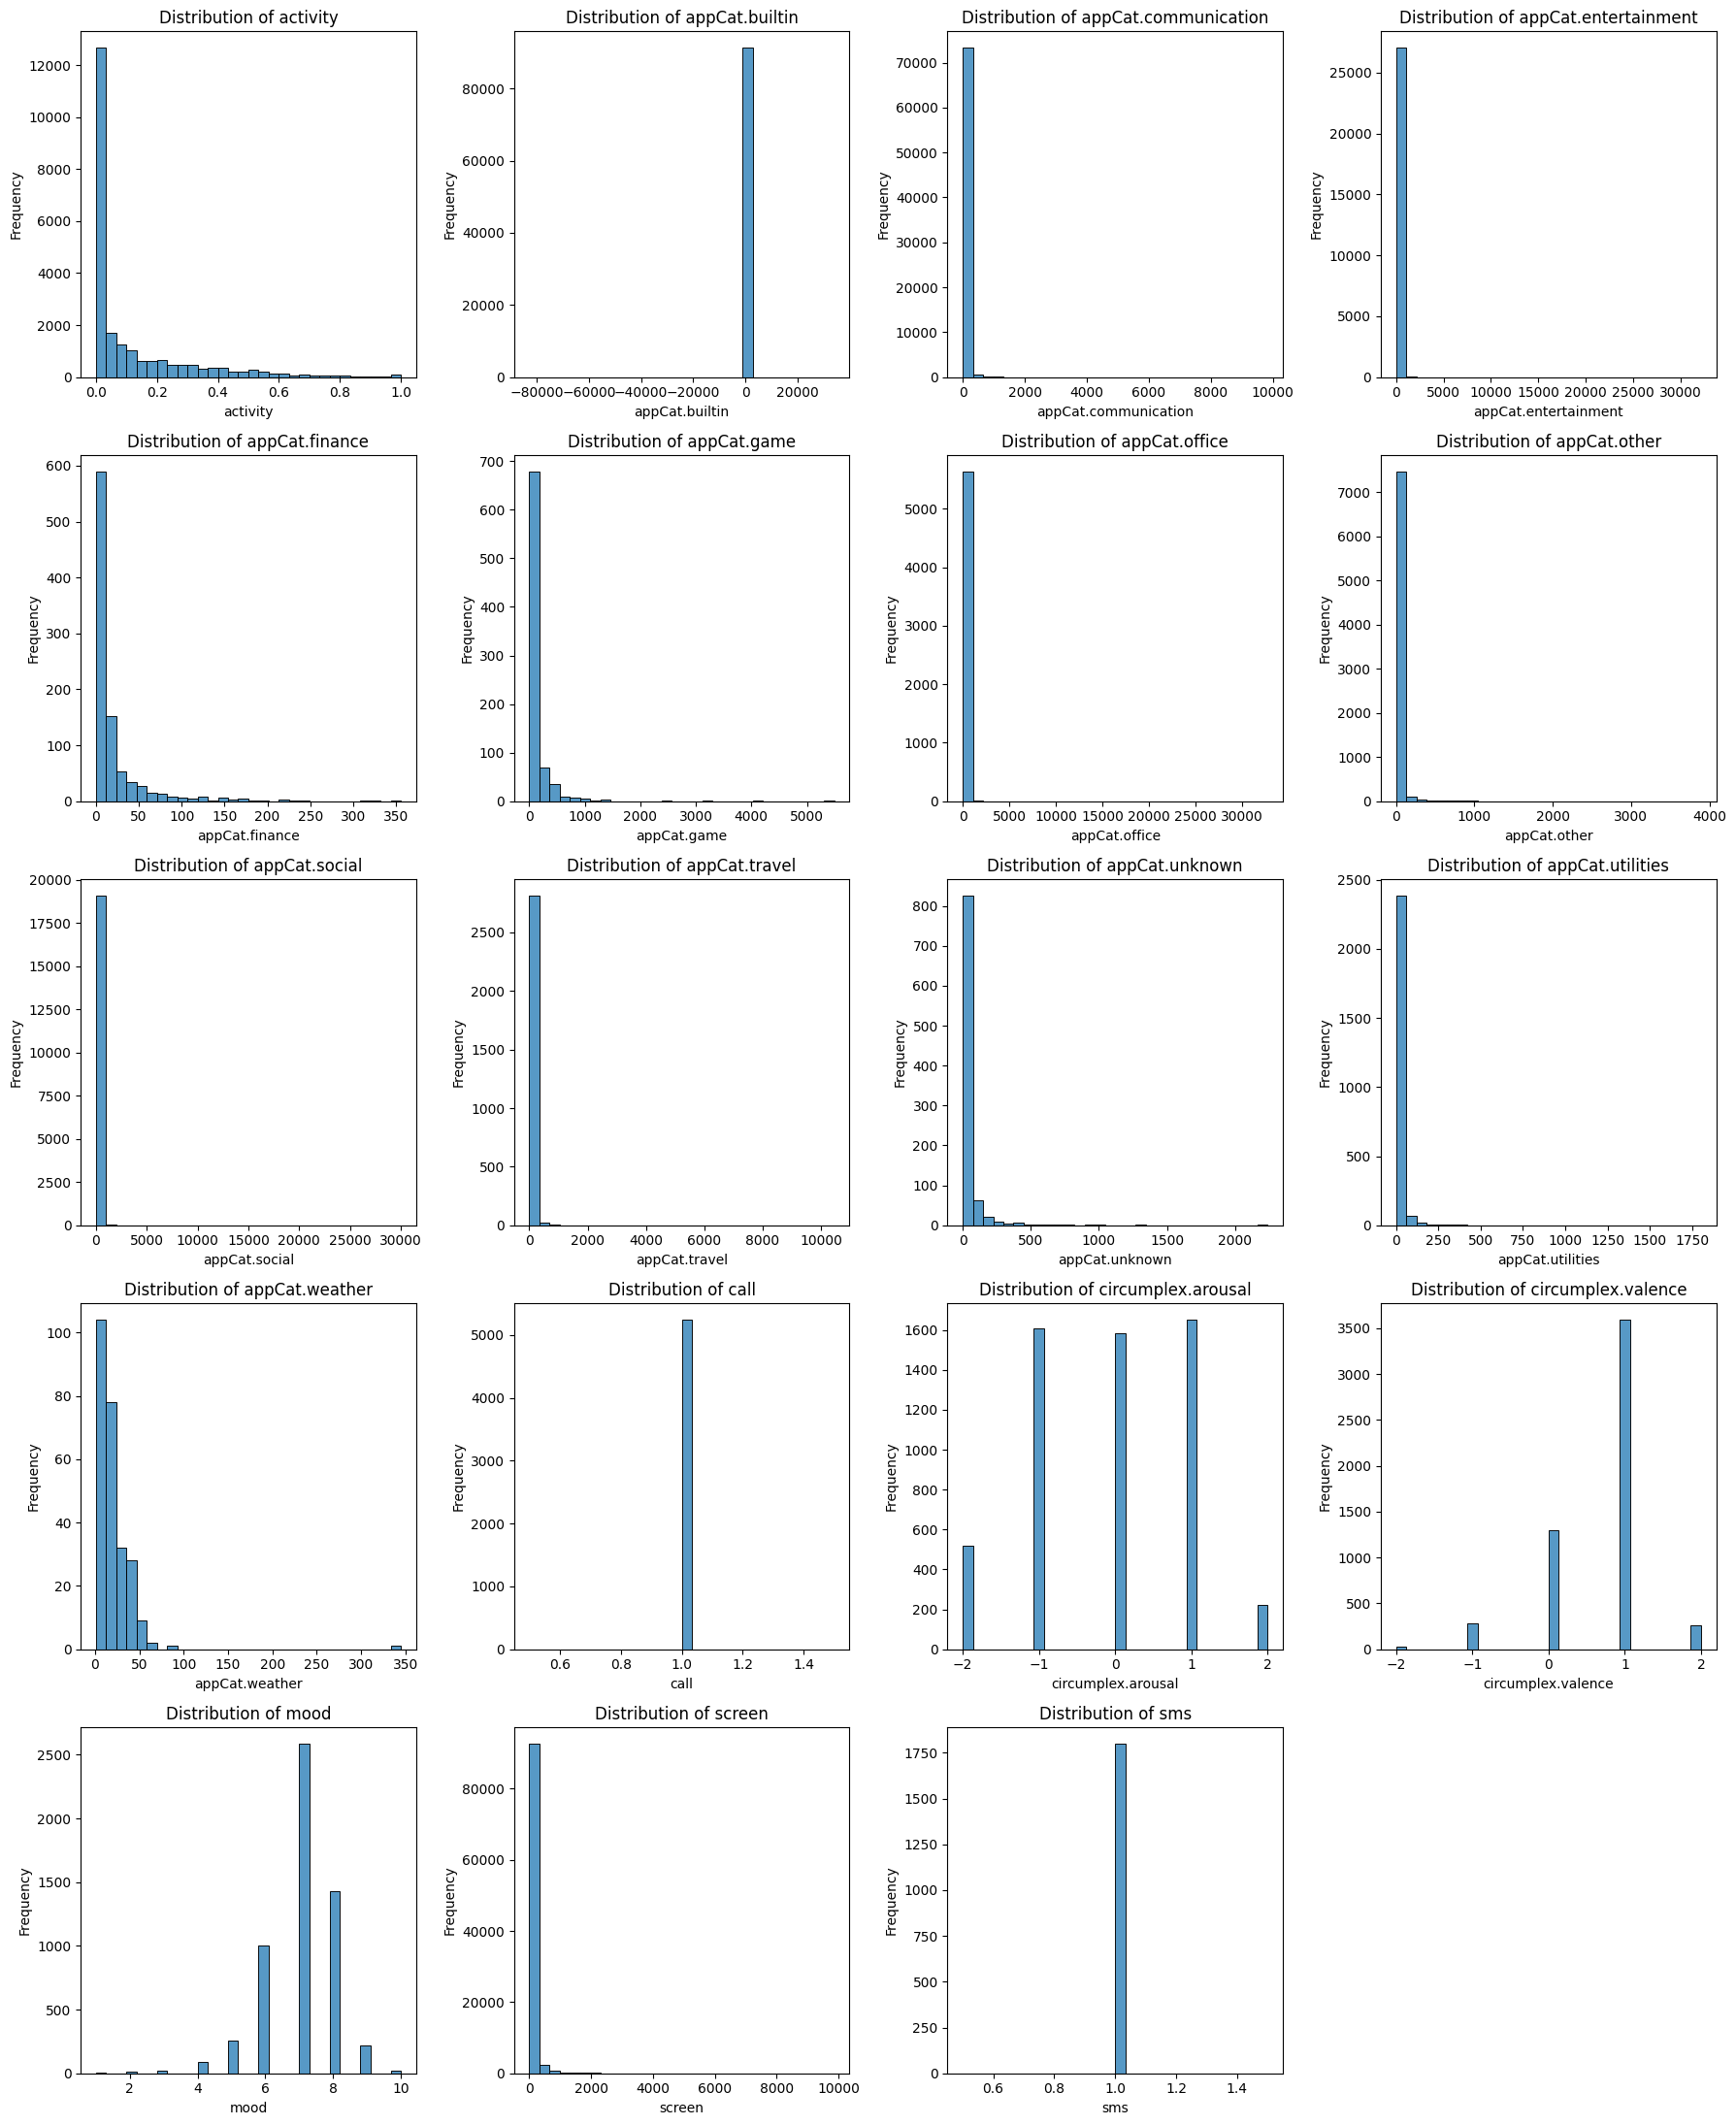

In [38]:
# Set up the figure layout to accommodate multiple plots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18, 22))
axes = axes.flatten()

# Plot histograms for each numeric column
for i, col in enumerate(data_pivoted.select_dtypes(include='float64').columns):
    sns.histplot(data_pivoted[col].dropna(), ax=axes[i], bins=30, kde=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig("Variable_Distributions.eps", format='eps')
#plt.show()


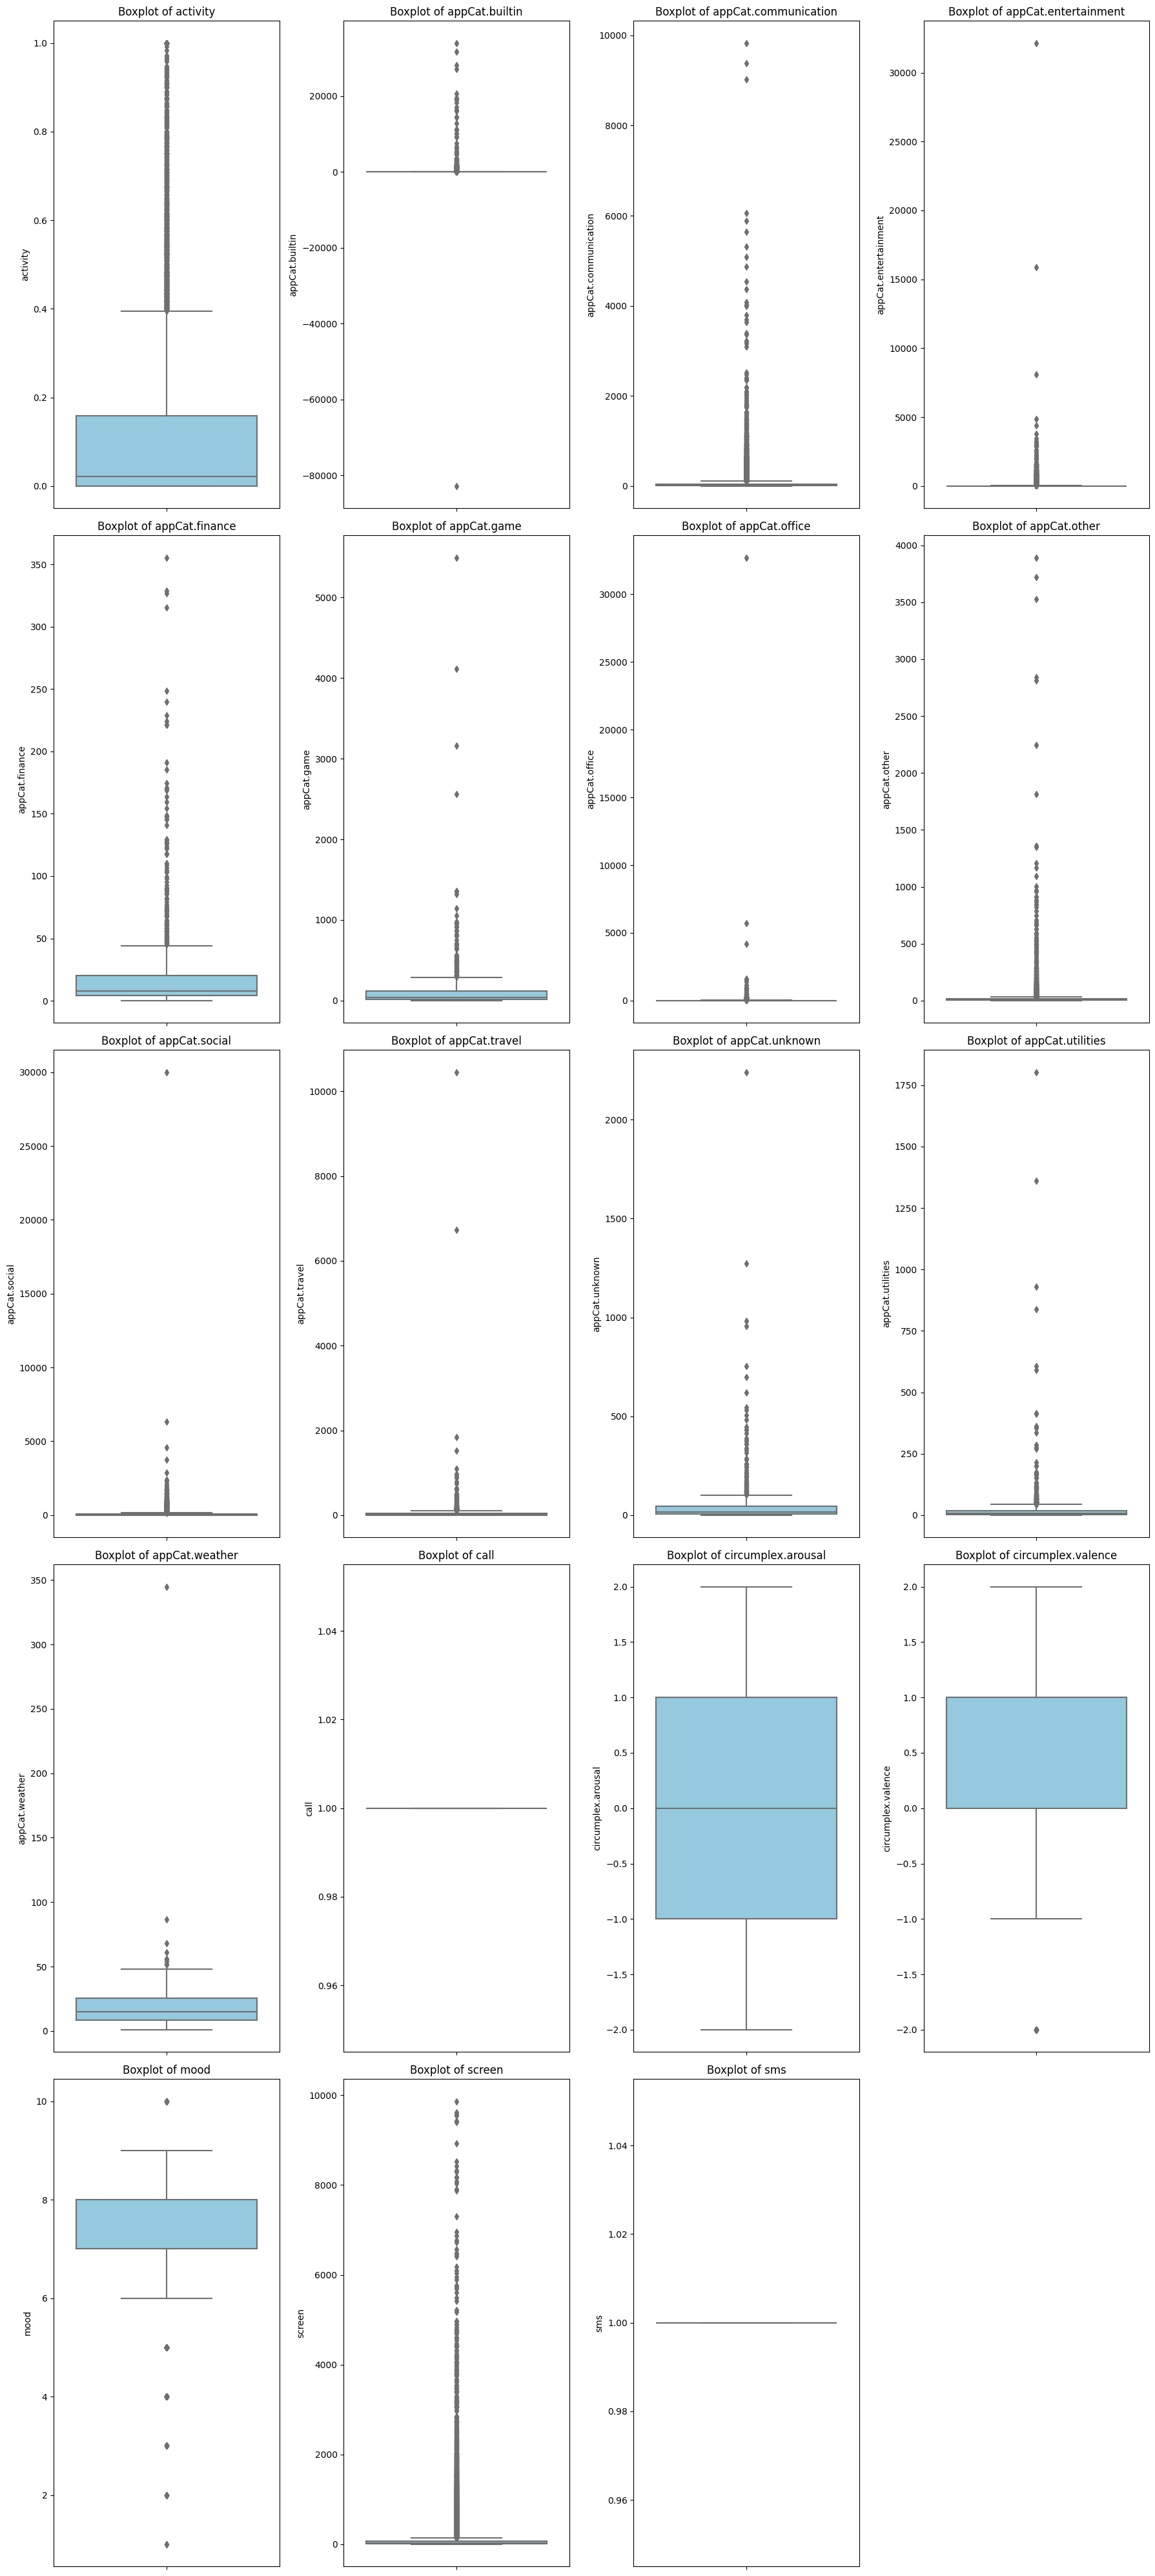

In [40]:
# Extract all numeric columns for histograms (excluding 'id' and 'time' which are not numeric)
numeric_vars = data_pivoted.select_dtypes(include=['float64', 'int64']).columns
# Set up the figure layout to accommodate multiple boxplots
fig, axes = plt.subplots(nrows=(len(numeric_vars) // 4 + (len(numeric_vars) % 4 > 0)), ncols=4, figsize=(18, 40))
axes = axes.flatten()

# Generate boxplots for each numeric column
for i, var in enumerate(numeric_vars):
    sns.boxplot(y=data_pivoted[var], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {var}')
    axes[i].set_ylabel(var)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig("Box_plot.eps", format='eps')


#### Outlier Analysis

In [16]:

# Function to calculate outliers using IQR
def calculate_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Calculate outliers for each variable of interest
outlier_counts = {}
outlier_percentages = {}

# List of all relevant variables including app categories
variables = ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'call', 'sms',
             'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 
             'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 
             'appCat.unknown', 'appCat.utilities', 'appCat.weather']

for var in variables:
    if data_pivoted[var].dtype == 'float64' or data_pivoted[var].dtype == 'int64':
        outliers = calculate_outliers(data_pivoted[var].dropna())
        outlier_counts[var] = len(outliers)
        outlier_percentages[var] = (len(outliers) / len(data_pivoted[var].dropna())) * 100

# Create a DataFrame to summarize the outlier analysis
outlier_summary = pd.DataFrame({
    "Variable": outlier_counts.keys(),
    "Number of Outliers": outlier_counts.values(),
    "Percentage of Outliers": outlier_percentages.values()
})

outlier_summary.sort_values(by='Percentage of Outliers', ascending=False)


,Variable,Number of Outliers,Percentage of Outliers
9,appCat.entertainment,4517,16.652535
12,appCat.office,848,15.030131
13,appCat.other,1000,13.071895
10,appCat.finance,118,12.566560
7,appCat.builtin,10152,11.120848
11,appCat.game,85,10.455105
4,screen,10055,10.411274
3,activity,2223,9.679948
14,appCat.social,1838,9.600418
8,appCat.communication,6401,8.617858


In [18]:
# Calculate the type of value, range, and number of missing values for each variable
attribute_info = {
    'Variable': [],
    'Type of Value': [],
    'Range of Values': [],
    'Number of Missing Values': []
}

for var in variables:
    # Appending variable name
    attribute_info['Variable'].append(var)
    
    # Determining type of value and appending
    if data_pivoted[var].dtype == 'float64':
        attribute_info['Type of Value'].append('Numeric')
    elif data_pivoted[var].dtype == 'int64':
        attribute_info['Type of Value'].append('Integer')
    else:
        attribute_info['Type of Value'].append('Categorical')
    
    # Calculating and appending range of values for numeric variables
    if data_pivoted[var].dtype == 'float64' or data_pivoted[var].dtype == 'int64':
        min_val = data_pivoted[var].min()
        max_val = data_pivoted[var].max()
        attribute_info['Range of Values'].append(f"{min_val} to {max_val}")
    else:
        attribute_info['Range of Values'].append("N/A")
    
    # Counting and appending number of missing values
    missing_count = data_pivoted[var].isna().sum()
    attribute_info['Number of Missing Values'].append(missing_count)

# Convert to DataFrame for easier LaTeX conversion
attribute_info_df = pd.DataFrame(attribute_info)
attribute_info_df


,Variable,Type of Value,Range of Values,Number of Missing Values
0,mood,Numeric,1.0 to 10.0,353298
1,circumplex.arousal,Numeric,-2.0 to 2.0,353344
2,circumplex.valence,Numeric,-2.0 to 2.0,353452
3,activity,Numeric,0.0 to 1.0,335961
4,screen,Numeric,0.0350000858306885 to 9867.00699996948,262348
5,call,Numeric,1.0 to 1.0,353687
6,sms,Numeric,1.0 to 1.0,357128
7,appCat.builtin,Numeric,-82798.871 to 33960.246,267638
8,appCat.communication,Numeric,0.006 to 9830.777,284650
9,appCat.entertainment,Numeric,-0.011 to 32148.677,331801


In [19]:
# Convert 'time' to datetime if not already done
if data_pivoted['time'].dtype == object:
    data_pivoted['time'] = pd.to_datetime(data_pivoted['time'])

# Extract date from datetime
data_pivoted['date'] = data_pivoted['time'].dt.date

# Calculate number of unique users and dates
num_unique_users = data_pivoted['id'].nunique()
num_unique_dates = data_pivoted['date'].nunique()

num_unique_users, num_unique_dates


(27, 113)

In [5]:
data_mood = data[data["variable"] == "mood" ]                               # Select the rows where the variable is "mood"
result_mood = data_mood.groupby(['id', 'date']).agg({'value': 'mean'}).reset_index()   # Group by id and date and calculate the mean of the value column

In [6]:
result_mood.describe()

,value
count,1268.000000
mean,6.990063
std,0.736465
min,3.000000
25%,6.600000
50%,7.000000
75%,7.500000
max,9.333333


In [7]:
len(data['date'].unique()), len(data['id'].unique())                       # Check the number of unique dates and ids

(113, 27)

In [8]:
unique_dates = result_mood['date'].unique()  # Get the unique dates
unique_ids = result_mood["id"].unique()      # Get the unique ids
print(len(unique_dates))                # Print the number of unique dates
print(len(unique_ids))                  # Print the number of unique ids

98
27


<Axes: xlabel='value', ylabel='Count'>

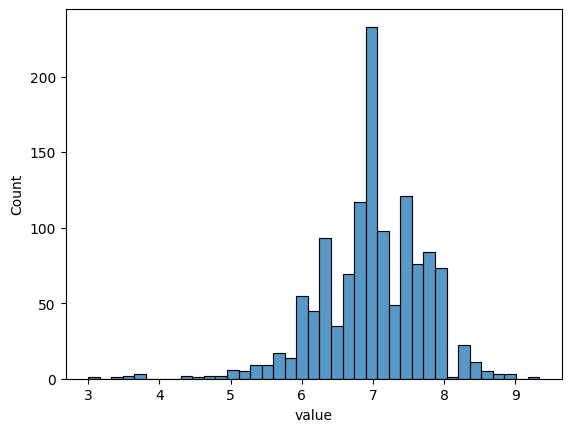

In [9]:
sns.histplot(result_mood, x="value")  # Create a histogram of the values

In [10]:
data["variable"].unique()

array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather'],
      dtype=object)

In [11]:
for column in data["variable"].unique():
    data[column] = data[data["variable"] == column]["value"]

In [12]:
data_arousal = data[data["variable"] == "circumplex.arousal"]
data_screen = data[data["variable"] == "screen"]                # Select the rows where the variable is "screen"
data_valence = data[data["variable"] == "circumplex.valence"]   # Select the rows where the variable is "circumplex.valence"
data_activity = data[data["variable"] == "activity"]            # Select the rows where the variable is "activity"  
data_call = data[data["variable"] == "call"]
data_sms = data[data["variable"] == "sms"]
data_built_in = data[data["variable"] == "appCat.builtin"]  
data_communication = data[data["variable"] == "appCat.communication"]
data_entertainment = data[data["variable"] == "appCat.entertainment"]
data_finance = data[data["variable"] == "appCat.finance"]
data_game = data[data["variable"] == "appCat.game"]
data_office = data[data["variable"] == "appCat.office"]
data_other = data[data["variable"] == "appCat.other"]
data_social = data[data["variable"] == "appCat.social"]
data_travel = data[data["variable"] == "appCat.travel"]
data_unknown = data[data["variable"] == "appCat.unknown"]
data_utility = data[data["variable"] == "appCat.utilities"]
data_weather = data[data["variable"] == "appCat.weather"]

In [13]:
df2 = pd.DataFrame(columns= ['index', 'mean', 'max', 'min'], index=range(0, len(data['variable'].unique())))
for i, column in tqdm(enumerate(data['variable'].unique())):
    df = data[data["variable"] == column]
    values = [column, df['value'].mean(), df['value'].max(), df['value'].min()]
    df2.loc[i] = values 

19it [00:00, 100.80it/s]


In [14]:
df2

,index,mean,max,min
0,mood,6.992555,10.0,1.0
1,circumplex.arousal,-0.098624,2.0,-2.0
2,circumplex.valence,0.687808,2.0,-2.0
3,activity,0.115958,1.0,0.0
4,screen,75.335206,9867.007,0.035
5,call,1.0,1.0,1.0
6,sms,1.0,1.0,1.0
7,appCat.builtin,18.538262,33960.246,-82798.871
8,appCat.communication,43.343792,9830.777,0.006
9,appCat.entertainment,37.57648,32148.677,-0.011


In [15]:
# Find negative values in the column and set them to positive
negative_indices = data_built_in['value'] < 0
data_built_in.loc[negative_indices, 'value'] = data_built_in.loc[negative_indices, 'value'].abs()
negative_indices = data_entertainment['value'] < 0
data_entertainment.loc[negative_indices, 'value'] = data_entertainment.loc[negative_indices, 'value'].abs()


In [17]:
data_built_in.max(), data_entertainment.min()

(id                             AS14.33
 time                      23:59:59.946
 variable                appCat.builtin
 value                        82798.871
 date                        2014-06-08
 mood                               NaN
 circumplex.arousal                 NaN
 circumplex.valence                 NaN
 activity                           NaN
 screen                             NaN
 call                               NaN
 sms                                NaN
 appCat.builtin               33960.246
 appCat.communication               NaN
 appCat.entertainment               NaN
 appCat.finance                     NaN
 appCat.game                        NaN
 appCat.office                      NaN
 appCat.other                       NaN
 appCat.social                      NaN
 appCat.travel                      NaN
 appCat.unknown                     NaN
 appCat.utilities                   NaN
 appCat.weather                     NaN
 dtype: object,
 id                     

In [18]:
result_screen = data_screen.groupby(['id', 'date']).agg({'value': 'sum'}).reset_index().rename(columns={'value': 'screen_time'})
result_arousal = data_arousal.groupby(['id', 'date']).agg({'value': 'mean'}).reset_index().rename(columns={'value': 'arousal_value'})
result_valence = data_valence.groupby(['id', 'date']).agg({'value': 'mean'}).reset_index().rename(columns={'value': 'valence_value'})
result_activity = data_activity.groupby(['id', 'date']).agg({"value": "mean"}).reset_index().rename(columns={'value': 'activity_time'})
result_call = data_call.groupby(['id', 'date']).agg({"value":"sum"}).reset_index().rename(columns={'value': 'call_time'})
result_sms = data_sms.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'sms_time'})
result_built_in = data_built_in.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'built_in_time'})
result_communication = data_communication.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'communication_time'})
result_entertainment = data_entertainment.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'entertainment_time'})
result_finance = data_finance.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'finance_time'})
result_game = data_game.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'game_time'})
result_office = data_office.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'office_time'})
result_other = data_other.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'other_time'})
result_social = data_social.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'social_time'})
result_travel = data_travel.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'travel_time'})    
result_unknown = data_unknown.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'unknown_time'})
result_utility = data_utility.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'utility_time'})
result_weather = data_weather.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'weather_time'})

In [19]:
result_built_in.max()

id                  AS14.33
date             2014-06-08
built_in_time     85229.812
dtype: object

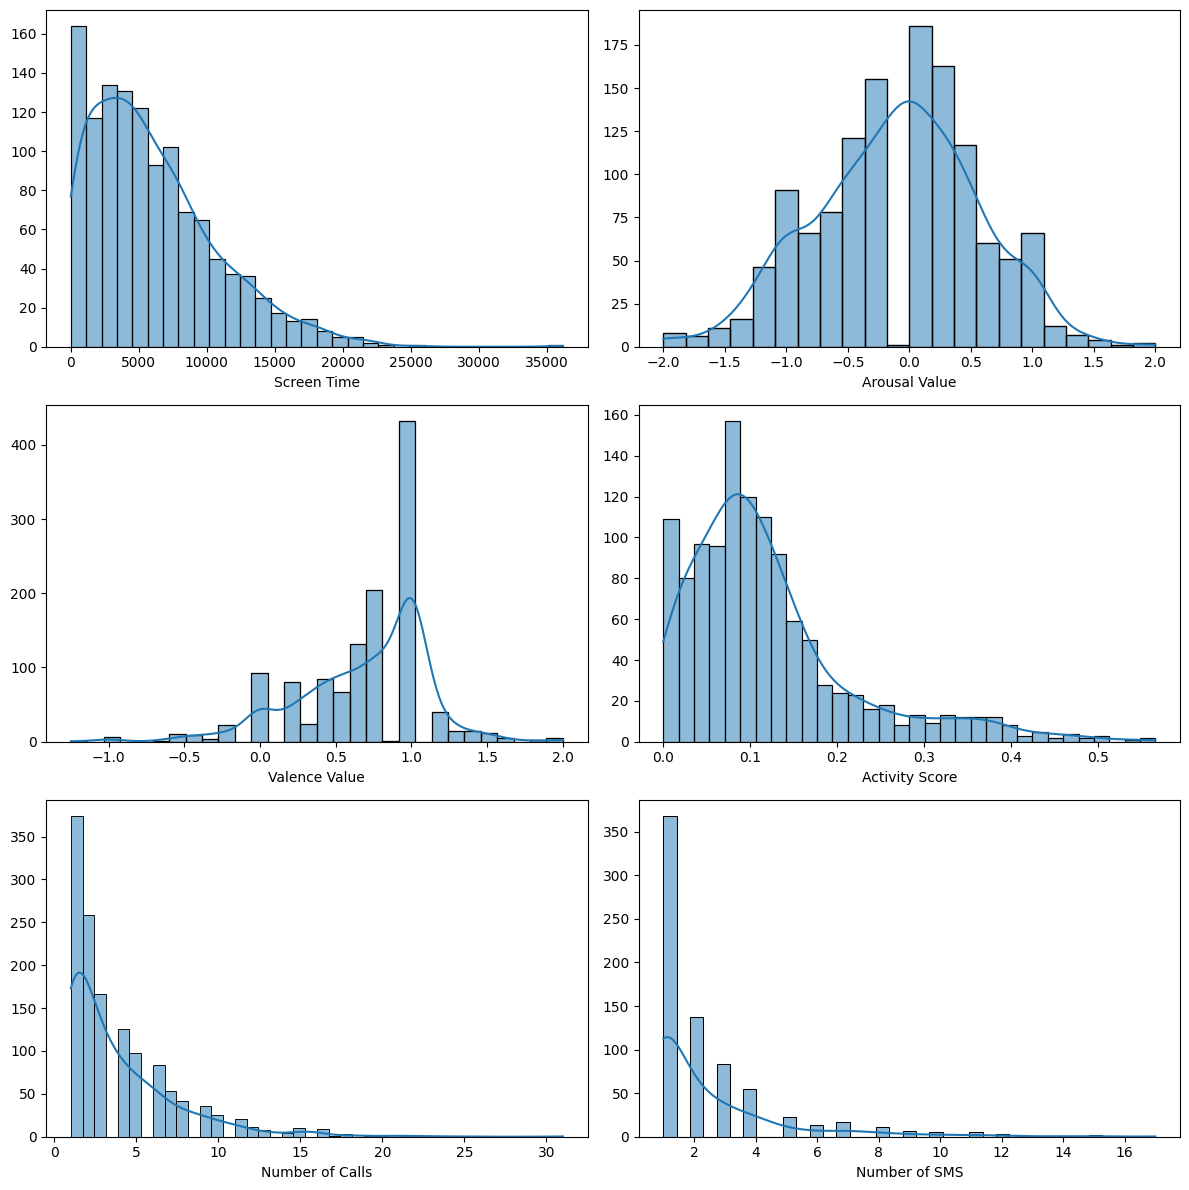

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Plotting histograms for each activity
sns.histplot(data=result_screen, x="screen_time", label="Screen", kde=True, ax=axes[0])
axes[0].set_xlabel("Screen Time")

sns.histplot(data=result_arousal, x="arousal_value", label="Arousal", kde=True, ax=axes[1])
axes[1].set_xlabel("Arousal Value")

sns.histplot(data=result_valence, x="valence_value", label="Valence", kde=True, ax=axes[2])
axes[2].set_xlabel("Valence Value")

sns.histplot(data=result_activity, x="activity_time", label="Activity", kde=True, ax=axes[3])
axes[3].set_xlabel("Activity Score")

sns.histplot(data=result_call, x="call_time", label="Call", kde=True, ax=axes[4])
axes[4].set_xlabel("Number of Calls")

sns.histplot(data=result_sms, x="sms_time", label="SMS", kde=True, ax=axes[5])
axes[5].set_xlabel("Number of SMS")

# Removing y-axis label to save space
for ax in axes:
    ax.set_ylabel("")

plt.tight_layout()
plt.show()



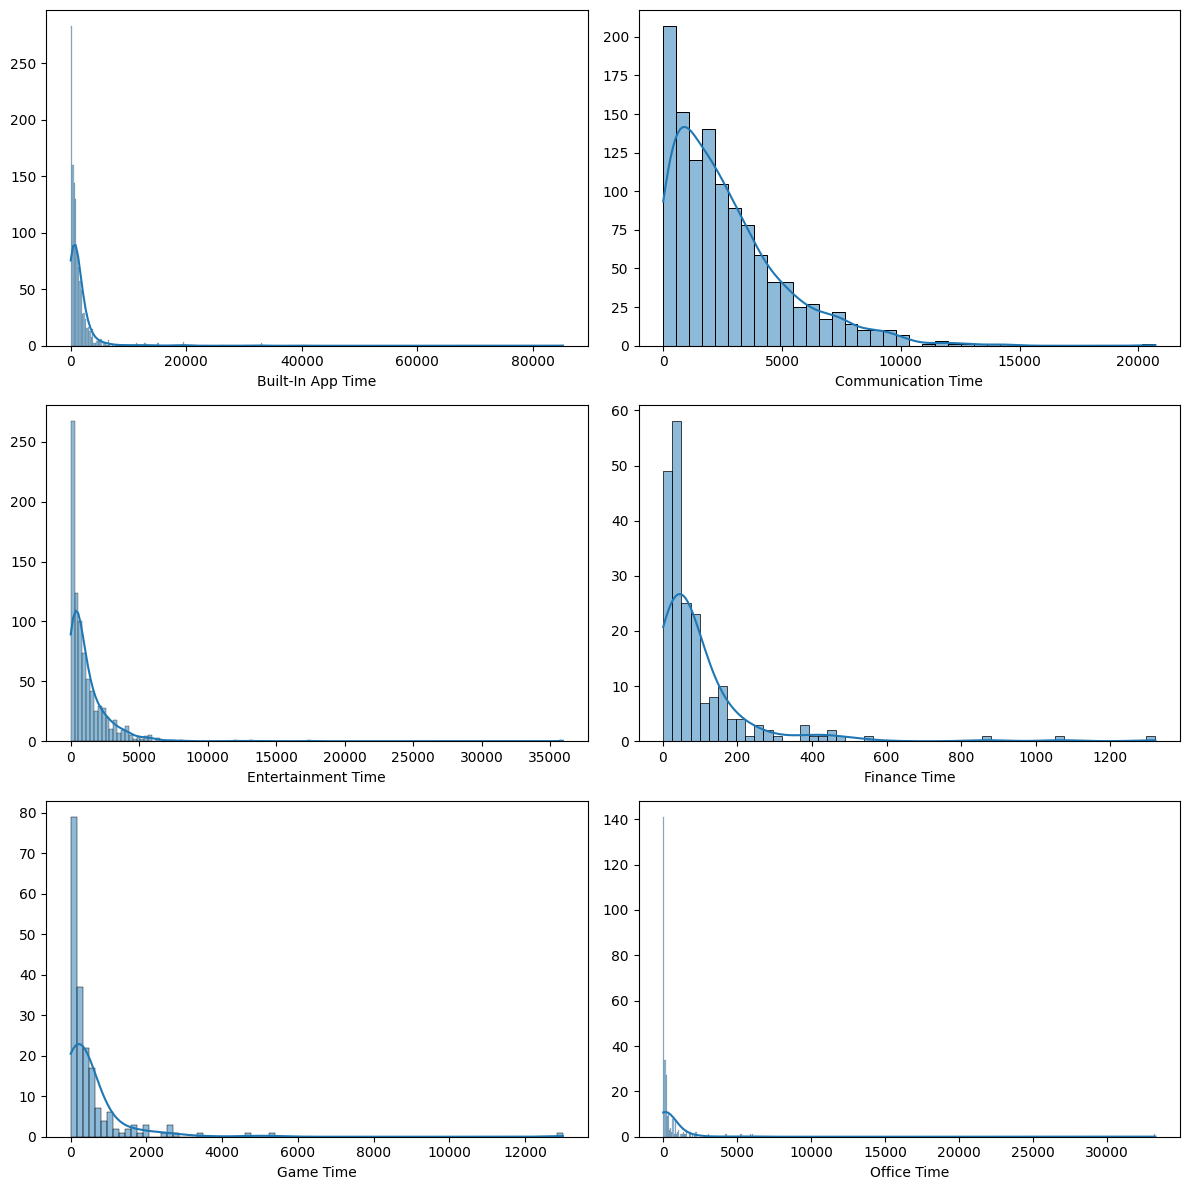

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Plotting histograms for each activity
sns.histplot(data=result_built_in, x="built_in_time", label="Built-In App", kde=True, ax=axes[0])
axes[0].set_xlabel("Built-In App Time")

sns.histplot(data=result_communication, x="communication_time", label="Communication", kde=True, ax=axes[1])
axes[1].set_xlabel("Communication Time")

sns.histplot(data=result_entertainment, x="entertainment_time", label="Entertainment", kde=True, ax=axes[2])
axes[2].set_xlabel("Entertainment Time")

sns.histplot(data=result_finance, x="finance_time", label="Finance", kde=True, ax=axes[3])
axes[3].set_xlabel("Finance Time")

sns.histplot(data=result_game, x="game_time", label="Game", kde=True, ax=axes[4])
axes[4].set_xlabel("Game Time")

sns.histplot(data=result_office, x="office_time", label="Office", kde=True, ax=axes[5])
axes[5].set_xlabel("Office Time")

# Removing y-axis label to save space
for ax in axes:
    ax.set_ylabel("")

plt.tight_layout()
plt.show()


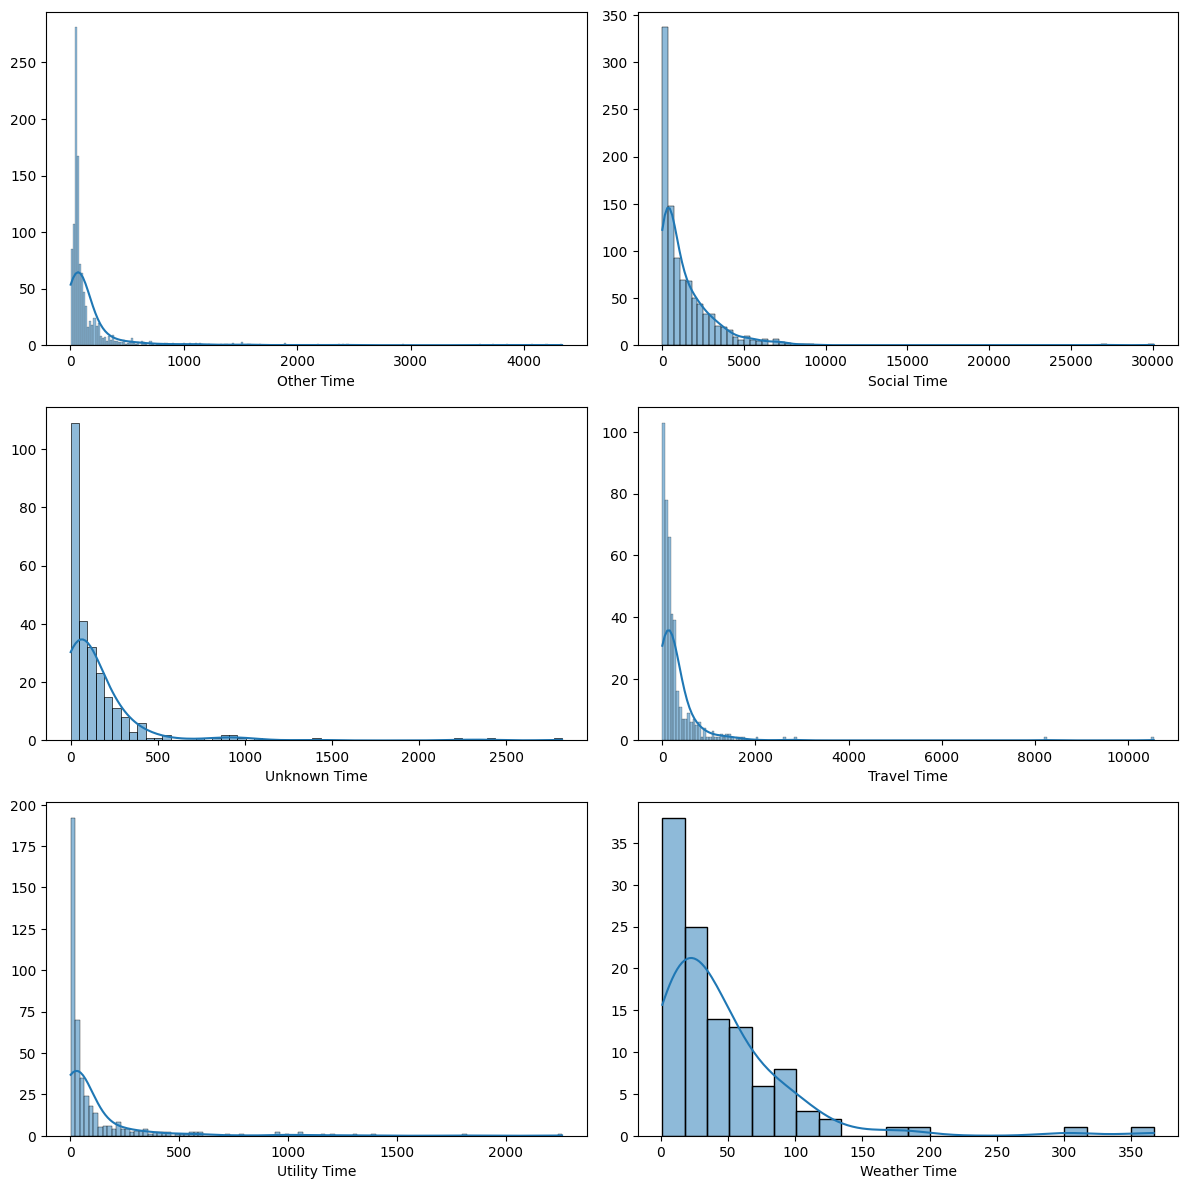

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Plotting histograms for each activity
sns.histplot(data=result_other, x="other_time", label="Other", kde=True, ax=axes[0])
axes[0].set_xlabel("Other Time")

sns.histplot(data=result_social, x="social_time", label="Social", kde=True, ax=axes[1])
axes[1].set_xlabel("Social Time")

sns.histplot(data=result_unknown, x="unknown_time", label="Unknown", kde=True, ax=axes[2])
axes[2].set_xlabel("Unknown Time")

sns.histplot(data=result_travel, x="travel_time", label="Travel", kde=True, ax=axes[3])
axes[3].set_xlabel("Travel Time")

sns.histplot(data=result_utility, x="utility_time", label="Utility", kde=True, ax=axes[4])
axes[4].set_xlabel("Utility Time")

sns.histplot(data=result_weather, x="weather_time", label="Weather", kde=True, ax=axes[5])
axes[5].set_xlabel("Weather Time")

# Removing y-axis label to save space
for ax in axes:
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

In [23]:
result_combined = result_screen.join(result_arousal.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_valence.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_activity.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_call.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_sms.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_built_in.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_communication.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_entertainment.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_finance.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_game.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_office.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_other.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_social.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_travel.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_unknown.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_utility.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_weather.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_mood.set_index(['id', 'date']), on=['id', 'date'])

In [24]:
final_df = result_combined

<Axes: ylabel='count'>

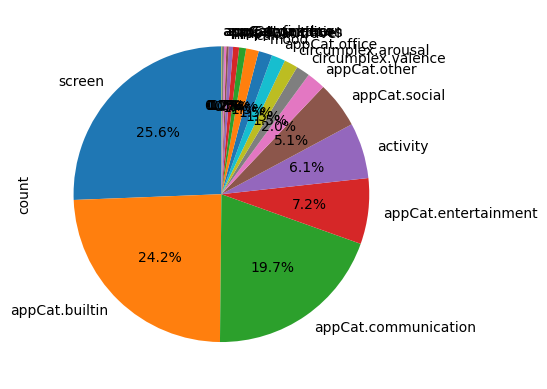

In [25]:
# Plot a pie chart
value_counts = data['variable'].value_counts()
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

In [26]:
final_df = final_df.dropna(subset=['value'])

<Axes: >

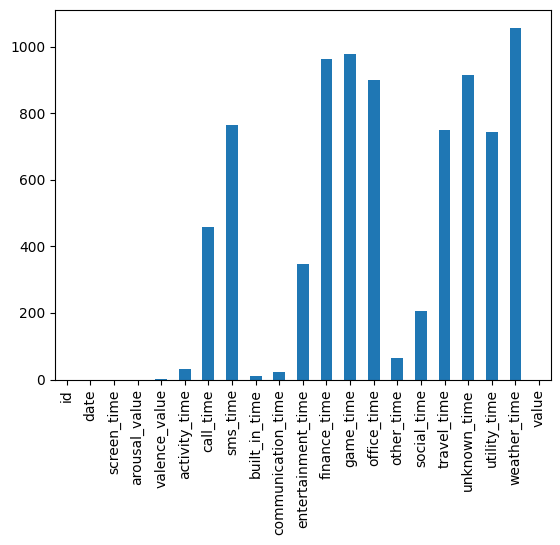

In [27]:
null_counts = final_df.isnull().sum()
null_counts.plot(kind='bar')

In [28]:
final_df = final_df.drop(columns=['id', 'date' ])

In [29]:
final_df.head()

,screen_time,arousal_value,valence_value,activity_time,call_time,sms_time,built_in_time,communication_time,entertainment_time,finance_time,game_time,office_time,other_time,social_time,travel_time,unknown_time,utility_time,weather_time,value
1,17978.907000,0.2,0.2,0.134050,6.0,NaN,3139.218,6280.890,1007.456,49.544,NaN,172.206,239.751,4508.500,915.445,NaN,598.754,NaN,6.20
2,6142.161000,0.6,0.5,0.236880,3.0,1.0,731.429,4962.918,93.324,21.076,NaN,NaN,98.143,439.632,37.305,NaN,117.621,NaN,6.40
3,6773.832001,0.2,0.8,0.142741,NaN,NaN,1286.246,5237.319,94.346,43.403,NaN,NaN,72.823,900.839,NaN,NaN,30.086,30.386,6.80
4,15047.351001,0.8,0.0,0.078961,10.0,NaN,866.956,9270.629,976.971,34.106,NaN,3.010,66.558,3223.626,419.805,NaN,178.732,NaN,6.00
5,21475.354999,0.5,0.5,0.098374,NaN,1.0,1032.768,10276.751,68.206,43.054,NaN,NaN,178.819,1919.471,NaN,235.223,222.893,NaN,6.75


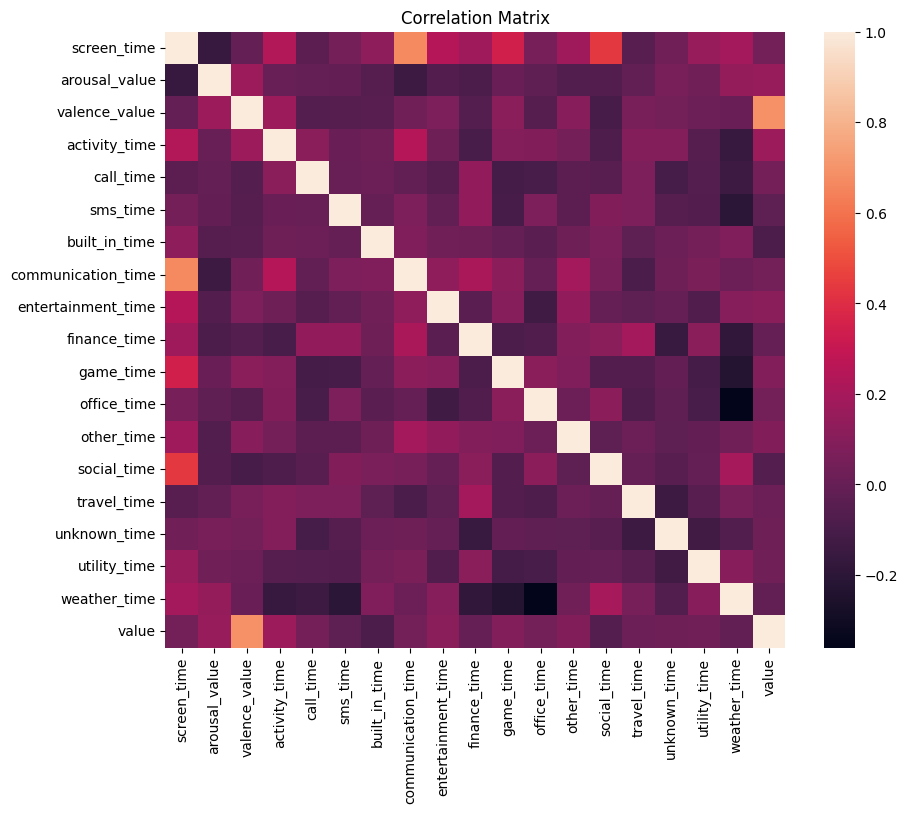

In [30]:
# Calculate correlation matrix
corr_matrix = final_df .corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix')
plt.show()

In [31]:
final_df = final_df.fillna(0)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [33]:
X = final_df.drop(columns=['value'])
y = final_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Model Training
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5400249287749288


In [34]:
X = np.array(final_df['valence_value']).reshape(-1, 1)
y = final_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Model Training
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2944955230690532


In [35]:
X = np.array(final_df['arousal_value']).reshape(-1, 1)
y = final_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Model Training
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.6475839145158877


In [36]:
X = final_df[['valence_value', 'arousal_value']]
y = final_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Model Training
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.38972422192348627


In [37]:
X = final_df[['valence_value', 'arousal_value', 'screen_time']]
y = final_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Model Training
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5385256410256409


In [38]:
X = final_df[['valence_value', 'arousal_value', 'screen_time', 'activity_time']]
y = final_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Model Training
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.553170702754036


In [39]:
correlation_matrix = final_df.corr().abs()
correlation_with_target = correlation_matrix['value'].drop('value')

# Sort features based on their correlation with the target variable
sorted_features = correlation_with_target.sort_values(ascending=False)


In [40]:
X = final_df.drop(columns=['value'])
y = final_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 3: Define a model
regressor = DecisionTreeRegressor(random_state=42)

# Step 4: Iterative feature elimination
n_features = X_train.shape[1]
selected_features = sorted_features.index
remaining_features = []


scores = []
for feature in selected_features:
    remaining_features.append(feature)
    X_train_subset = X_train[remaining_features]
    X_test_subset = X_test[remaining_features]
    regressor.fit(X_train_subset, y_train)
    y_pred = regressor.predict(X_test_subset)
    mse = mean_squared_error(y_test, y_pred)
    scores.append((mse))
    
    # Remove the least important feature
    scores.sort()
    

In [41]:
selected_features

Index(['valence_value', 'activity_time', 'arousal_value', 'entertainment_time',
       'built_in_time', 'other_time', 'game_time', 'social_time',
       'communication_time', 'sms_time', 'utility_time', 'office_time',
       'screen_time', 'call_time', 'unknown_time', 'travel_time',
       'weather_time', 'finance_time'],
      dtype='object')

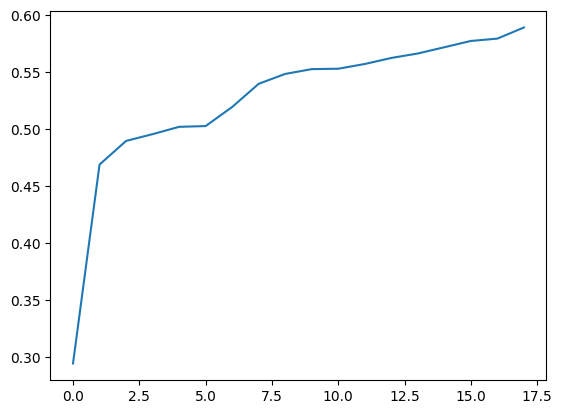

In [42]:
plt.plot(scores)

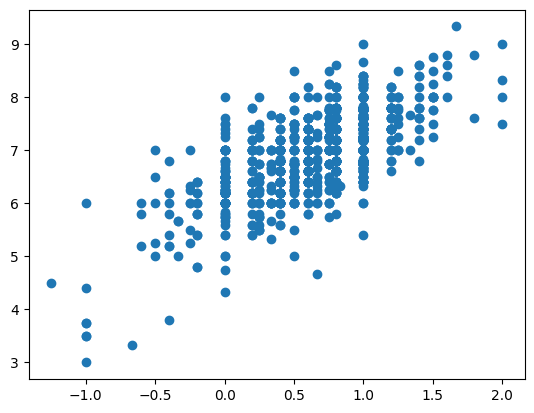

In [43]:
plt.scatter(final_df['valence_value'], final_df['value'])

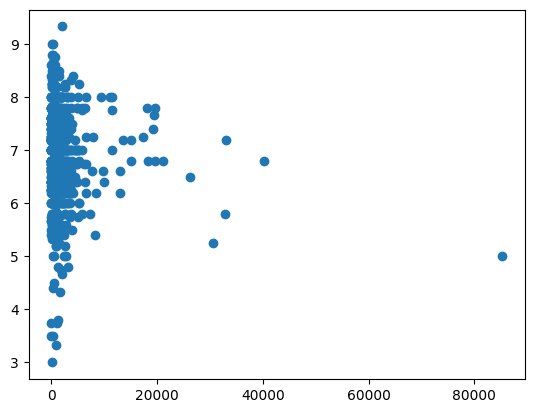

In [45]:
plt.scatter(final_df['built_in_time'], final_df['value'])

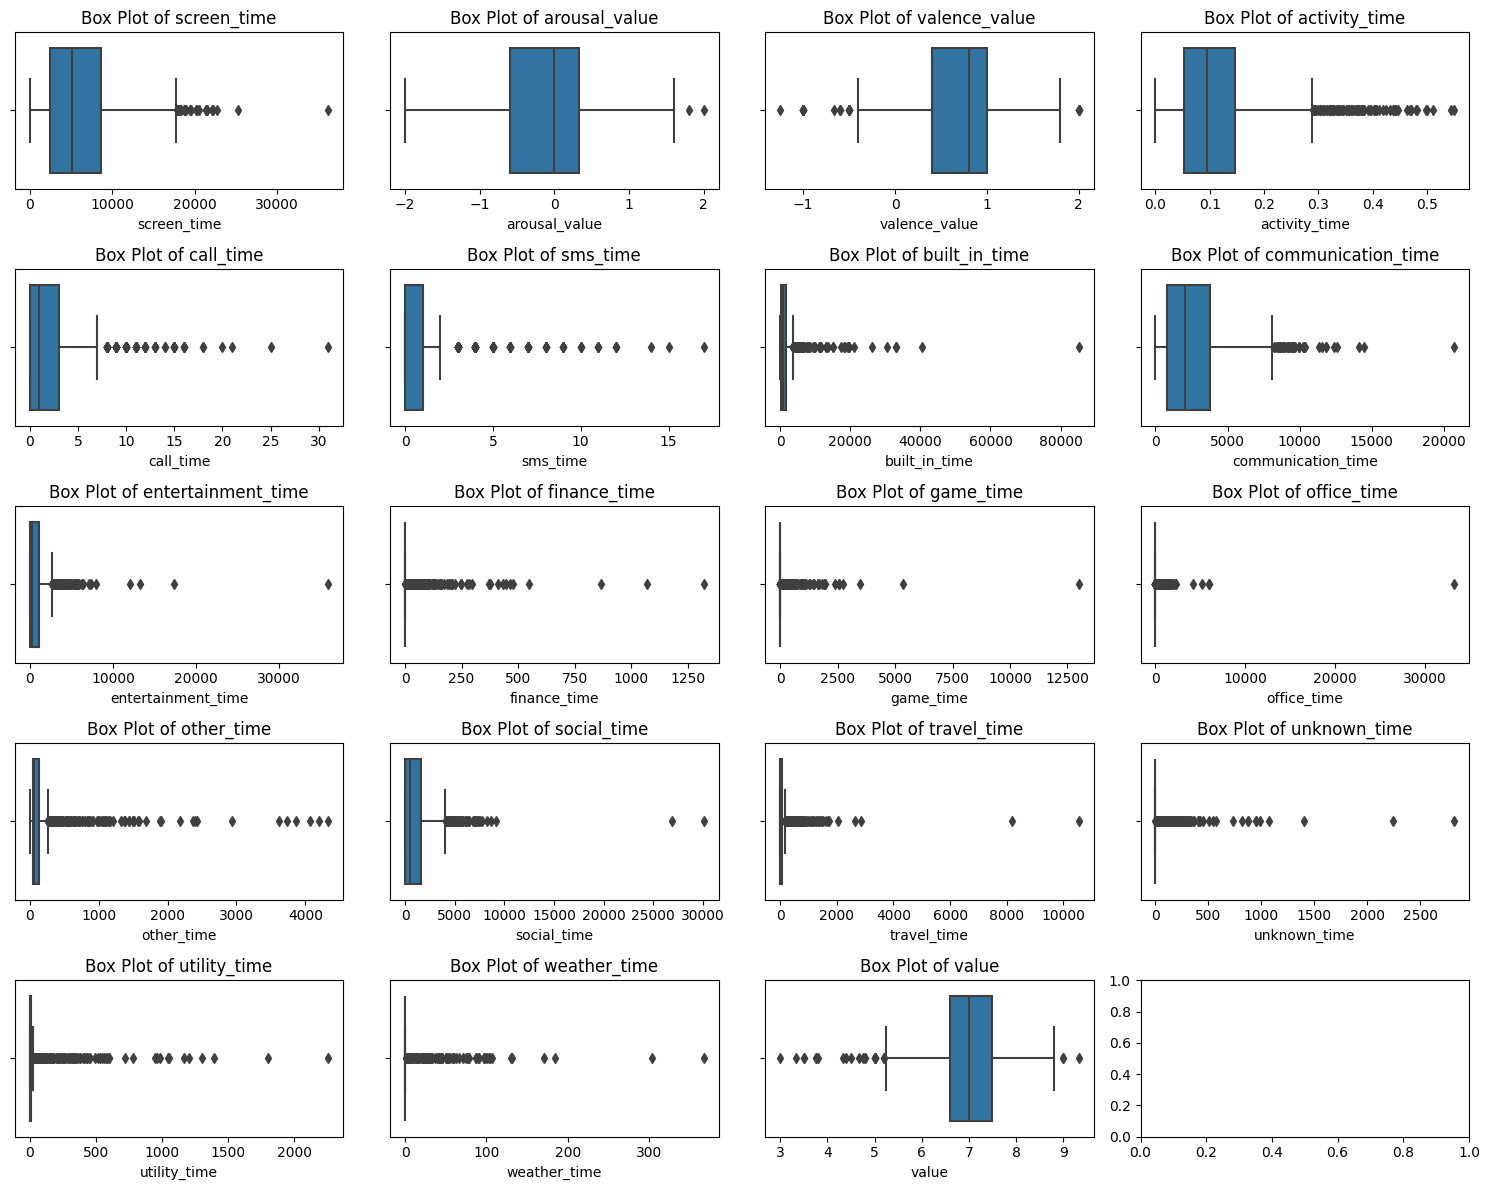

In [46]:
# Create multiple subplots for each column
fig, axes = plt.subplots(5, 4, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(final_df.columns):
    sns.boxplot(x=final_df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

#Hide any unused subplots
for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [104]:
final_df.skew().sort_values(ascending=False)

office_time           28.270196
game_time             19.001072
travel_time           16.785154
built_in_time         11.682998
unknown_time          11.628350
finance_time          10.993283
weather_time          10.656788
entertainment_time    10.250447
utility_time           7.828208
social_time            6.745080
other_time             6.589836
sms_time               4.486821
call_time              2.931363
activity_time          1.614003
communication_time     1.609781
screen_time            1.132220
arousal_value         -0.125044
value                 -0.840164
valence_value         -0.865423
dtype: float64

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
def yeojohntrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    yeojohnTr = PowerTransformer(standardize=True)   # not using method attribute as yeo-johnson is the default

    # plt.figure(figsize=(15,6))
    # plt.subplot(1,2,1)
    # plt.title("Distribution before Transformation", fontsize=15)
    # sns.histplot(final_df[feature], kde=True, color="red")
    # plt.subplot(1,2,2)
    
    df_yeojohn = pd.DataFrame(yeojohnTr.fit_transform(final_df[feature].values.reshape(-1,1)))
    # plt.title("Distribution after Transformation", fontsize=15)
    # sns.histplot(df_yeojohn,bins=20, kde=True , legend=False)
    # plt.xlabel(feature)
    # plt.show()
    
    print(f"Skewness {round(df_yeojohn.skew()[0],2)} after Yeo-johnson transformation.")
    
    return df_yeojohn
    
for column in final_df.columns:
    if column != 'value':
        final_df[column] = yeojohntrans(column)
    

In [ ]:
# Calculate correlation matrix
corr_matrix = final_df .corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
plt.scatter( final_df['valence_value'], final_df['value'])